# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [66]:
#  1. Get the total rides for each city type
# instructions : apply count method 
total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [34]:
# 2. Get the total drivers for each city type
# instructions : apply sum method 
total_driver_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_count.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [35]:
#  3. Get the total amount of fares for each city type
# instructions : use sum() method 
total_fare_count = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_count.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [47]:
#  4. Get the average fare per ride for each city type. 
# instructions: dividing the sum of all the fares by the total rides.
average_fare = total_fare_count / total_ride_count
average_fare.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [48]:
# 5. Get the average fare per driver for each city type. 
# instructions: divide the sum of all the fares by the total drivers.
average_driver_fare = total_fare_count / total_driver_count
average_driver_fare

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [54]:
#  6. Create a PyBer summary DataFrame. 
# "" : variable to establish parameters
pyber_summary_df = pd.DataFrame( { 
    "Type" : type, 
    "Total Rides": total_ride_count, 
    "Total Drivers": total_driver_count, 
    "Total Fares": total_fare_count, 
    "Average Fare per Ride": average_fare, 
    "Average Fare per Driver": average_driver_fare }
    )

In [55]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df = pd.DataFrame( { 
    "Total Rides": total_ride_count, 
    "Total Drivers": total_driver_count, 
    "Total Fares": total_fare_count, 
    "Average Fare per Ride": average_fare, 
    "Average Fare per Driver": average_driver_fare }
    )
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [10]:
#  8. Format the columns.



## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [57]:
# Print the merged DataFrame for reference.
# .head() to display dataframe
# merged dataframe from top of page: pyber_data_df
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [99]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
# In Step 1, create a new DataFrame with multiple indices using the groupby() 
# function on the "type" and "date" columns of the pyber_data_df DataFrame, 
# then apply the sum() method on the "fare" column to show the total fare amount for each date.
# from hint: creating a new dataframe
new_df = pyber_data_df.groupby(['type','date']).sum()['fare']                      

In [103]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
new_df = new_df.reset_index()
new_df.head(10)

,index,type,date,fare
0,0,Rural,2019-01-01 09:45:36,43.69
1,1,Rural,2019-01-02 11:18:32,52.12
2,2,Rural,2019-01-03 19:51:01,19.90
3,3,Rural,2019-01-04 03:31:26,24.88
4,4,Rural,2019-01-06 07:38:40,47.33
5,5,Rural,2019-01-08 06:19:45,19.39
6,6,Rural,2019-01-09 15:30:35,31.84
7,7,Rural,2019-01-11 04:39:27,16.42
8,8,Rural,2019-01-14 07:09:17,18.05
9,9,Rural,2019-01-14 15:58:48,54.10


In [105]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
# from hint: creating pivot table by setting values 
new_df_pivot = new_df.pivot(index='date',columns='type',values='fare')
new_df_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [106]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
new2_df = new_df_pivot.loc['2019-01-01':'2019-04-28']
new2_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [108]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
new2_df.index = pd.to_datetime(new2_df.index)
new2_df.index

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-27 14:11:38', '2019-04-27 14:37:32',
               '2019-04-27 14:57:38', '2019-04-27 16:20:00',
               '2019-04-27 16:22:23', '2019-04-27 17:58:27',
               '2019-04-27 19:45:48', '2019-04-27 20:41:36',
               '2019-04-27 23:26:03', '2019-04-27 23:52:44'],
              dtype='datetime64[ns]', name='date', length=2177, freq=None)

In [109]:
# 6. Check that the datatype for the index is datetime using df.info()
new2_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [111]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
new3_df = new2_df.resample('W').sum()
new3_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


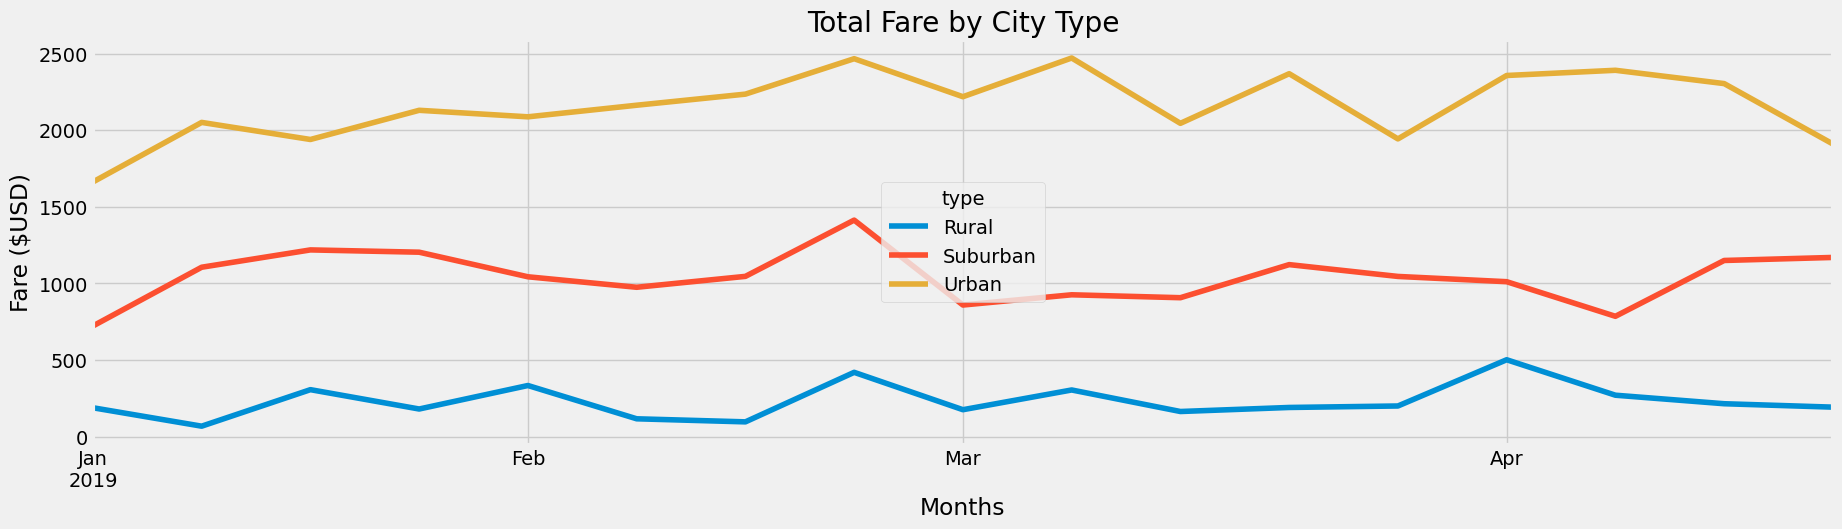

<Figure size 640x480 with 0 Axes>

In [130]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
new4 = new3_df.plot(figsize = (20,5))
style.use('fivethirtyeight')
new4.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
new4.set_xlabel("Months")
new4.set_ylabel("Fare ($USD)")

plt.show()
plt.tight_layout()